# XGBoost model for prediction of avalanche events

In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# installation of XGBoost
!pip install xgboost

In [3]:
# import needed objects from Scikit learn library for machine learning

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold

In [4]:
# I would like to see all rows and columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading dataset and final preprocessing

In [5]:
# reading dataset
df = pd.read_csv("final_data.csv")

In [6]:
df.head()

,elevation,massif_num,lon,lat,temp_soil_0.005_m,temp_soil_0.08_m,liquid_water_in_soil,frozen_water_in_soil,risk_index,aval_type,whiteness_albedo,net_radiation,drainage,runoff,snow_melting_rate,rainfall_rate,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_1D,snow_thickness_3D,snow_thickness_5D,snow_thickness_7D,snow_water_1D,snow_water_3D,snow_water_5D,snow_water_7D,penetration_ram_resistance,thickness_of_wet_snow_top_of_snowpack,thickness_of_frozen_snow_top_of_snowpack,acccidental_risk_index,day,surface_air_pressure_mean,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_accident,aval_event
0,1500.0,1,6.64493,46.17685,277.709158,279.014864,0.323705,0.0,6.0,6.0,0.2,3.251180,0.000018,0.000019,0.0,0.000096,277.709158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-01,84550.445,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0
1,1500.0,1,6.64493,46.17685,279.496314,280.143477,0.310928,0.0,6.0,6.0,0.2,79.345799,0.000018,0.000000,0.0,0.000000,279.496314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-02,84550.445,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0
2,1500.0,1,6.64493,46.17685,278.575394,280.282568,0.305990,0.0,6.0,6.0,0.2,44.215499,0.000018,0.000000,0.0,0.000000,278.575394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-03,84550.445,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0
3,1500.0,1,6.64493,46.17685,280.511023,281.446828,0.301774,0.0,6.0,6.0,0.2,73.435071,0.000018,0.000000,0.0,0.000000,280.511023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-04,84550.445,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0
4,1500.0,1,6.64493,46.17685,280.790508,281.635283,0.319800,0.0,6.0,6.0,0.2,17.299822,0.000018,0.000008,0.0,0.000047,280.790508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-05,84550.445,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0


In [7]:
# viewing all variables to decide which are not useful
df.columns

Index(['elevation', 'massif_num', 'lon', 'lat', 'temp_soil_0.005_m',
       'temp_soil_0.08_m', 'liquid_water_in_soil', 'frozen_water_in_soil',
       'risk_index', 'aval_type', 'whiteness_albedo', 'net_radiation',
       'drainage', 'runoff', 'snow_melting_rate', 'rainfall_rate',
       'surface_temperature', 'surface_snow_amount', 'thickness_of_snowfall',
       'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
       'snow_thickness_7D', 'snow_water_1D', 'snow_water_3D', 'snow_water_5D',
       'snow_water_7D', 'penetration_ram_resistance',
       'thickness_of_wet_snow_top_of_snowpack',
       'thickness_of_frozen_snow_top_of_snowpack', 'acccidental_risk_index',
       'day', 'surface_air_pressure_mean', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'massif_name',
       'aval_accid

In [8]:
# removing variables not needed for the model
df_clean = df.drop(columns=["massif_num","lon","lat","aval_type", "acccidental_risk_index", 
                            'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
                           'snow_water_1D', 'snow_water_3D', 'snow_water_5D', 'risk_index',
                           'thickness_of_wet_snow_top_of_snowpack','thickness_of_frozen_snow_top_of_snowpack',
                           'surface_air_pressure_mean', 'rainfall_rate', 'drainage', 'runoff',
                           'liquid_water_in_soil', 'frozen_water_in_soil', 'elevation','snow_melting_rate', 'aval_accident'])

In [9]:
# viewing if data type of the variables is suitable for XGBoost
# there are 2 string categorical variables that needs to be transformed: day and massif name
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540818 entries, 0 to 540817
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  day                                 540818 non-null  object 
 11  near_surface_humidity_mean

In [10]:
df_clean.shape

(540818, 22)

In [11]:
# for transformation of massif names I will use OneHotEncoding with pd.get_dummies method
# selecting of values for dummies
df_clean.massif_name.unique()

array(['Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour'], dtype=object)

In [12]:
massifs = ('Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour')

In [13]:
# creating initial dataframe
df_massifs = pd.DataFrame(massifs, columns=['massif_name'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_massifs, columns=["massif_name"], prefix="massif")

# merge initial dataframe with dummies
df_massifs = df_massifs.join(dum_df)

# merge final datatset with dataframe with dummies
df_clean = df_clean.merge(df_massifs, how="left", on="massif_name")

In [14]:
# checking dataset with dummy variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['massif_name'])

In [16]:
# second categorical variable to transform is day
# slicing is used to get years and months from day variable
# and after we need to transform years and months to integers
df_clean["year"] = (df_clean.day.str[:4]).astype(int)
df_clean["month"] = (df_clean.day.str[5:7]).astype(int)
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,year,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10


In [17]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['day', 'year'])

In [18]:
# checking dataset with new time variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [19]:
# verifying there are no null values in dataset
(df_clean.apply(lambda x: x.isnull().sum())).sum()

0

In [20]:
# checking one last time my dataset before creating RF models
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 44 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  near_surface_humidity_mean          540818 non-null  float64
 11  relative_humidity_mean    

## Problem with very imbalanced dataset
- metrics like Accuracy will be very high, but that does not provide any significant insight, because of imbalanced dataset with majority of No avalanche events
- in classification report metrics **Precision will have lesser importance for my analysis than Recall**, because I want to reduce number of False Negatives rather then number of False Positives
- **For performance of XGBoost model, I will look mainly on weighted F1-score** metrics because it is the most suitable for this kind of analysis. F1-score is in fact weighted average of the precision and recall.

In [21]:
# Percentage of cases with and without avalanches showing imbalanced dataset
round((df_clean.aval_event.value_counts()/540818)*100, 2)

0    99.62
1     0.38
Name: aval_event, dtype: float64

In [22]:
# getting number of positives and negatives in order to calculate scale_pos_weight
total_negative = df_clean.aval_event.value_counts()[0]
total_positive = df_clean.aval_event.value_counts()[1]
f"Number of total positives is {total_positive} and for total negatives it is {total_negative}"

'Number of total positives is 2039 and for total negatives it is 538779'

In [23]:
# scale_pos_weight for class weights
scale_pos_weight=total_negative/total_positive
scale_pos_weight

264.2368808239333

In [24]:
# labels are the values we want to predict
labels_ev = np.array(df_clean['aval_event'])

# removing the labels from the features
features_ev = df_clean.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_ev = list(features_ev.columns)

# converting to numpy array
features_ev = np.array(features_ev)

In [25]:
# splitting dataset into train and test
train_features_ev, test_features_ev, train_labels_ev, test_labels_ev = train_test_split(features_ev, labels_ev, test_size = 0.33, random_state = 42)

In [26]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_ev.shape)
print('Training Labels Shape:', train_labels_ev.shape)
print('Testing Features Shape:', test_features_ev.shape)
print('Testing Labels Shape:', test_labels_ev.shape)

Training Features Shape: (362348, 43)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 43)
Testing Labels Shape: (178470,)


In [27]:
# defining  and fitting model 
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb.fit(train_features_ev, train_labels_ev)

# making prediction
label_pred_ev = xgb.predict(test_features_ev)

In [28]:
%%time
# defining evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating model
scores = cross_val_score(xgb, features_ev, labels_ev, scoring='roc_auc', cv=cv, n_jobs=-1)

# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_ev, label_pred_ev),5))
print("F1_score weighted:", round(f1_score(test_labels_ev, label_pred_ev, average='weighted'),5))

Mean ROC AUC: 0.99862
Accuracy: 0.99444
F1_score weighted: 0.99546
Wall time: 32min 27s


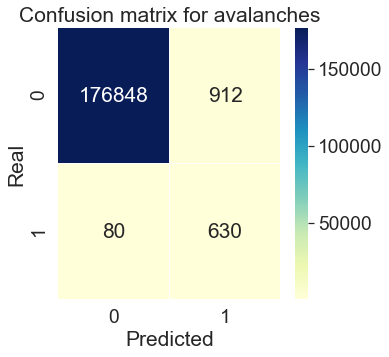

In [29]:
# displaying confusion matrix
sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(5, 5))
cf_matrix_basic = confusion_matrix(test_labels_ev, label_pred_ev)
sns.heatmap(cf_matrix_basic, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [30]:
# displaying report of performance of model
print(classification_report(test_labels_ev, label_pred_ev, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.995     0.997    177760
           1      0.409     0.887     0.560       710

    accuracy                          0.994    178470
   macro avg      0.704     0.941     0.778    178470
weighted avg      0.997     0.994     0.995    178470



## Results without summer months

In [31]:
# creating dataframe without summer months
summer_season = [6, 7, 8]
df_winter = df_clean[~df_clean["month"].isin(summer_season)]

In [32]:
df_winter.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [33]:
# labels are the values we want to predict
labels_win = np.array(df_winter['aval_event'])

# removing the labels from the features
features_win = df_winter.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_win = list(features_win.columns)

# converting to numpy array
features_win = np.array(features_win)

In [34]:
# splitting dataset into train and test
train_features_win, test_features_win, train_labels_win, test_labels_win = train_test_split(features_win, labels_win, test_size = 0.33, random_state = 42)

In [35]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_win.shape)
print('Training Labels Shape:', train_labels_win.shape)
print('Testing Features Shape:', test_features_win.shape)
print('Testing Labels Shape:', test_labels_win.shape)

Training Features Shape: (272164, 43)
Training Labels Shape: (272164,)
Testing Features Shape: (134052, 43)
Testing Labels Shape: (134052,)


In [36]:
# getting number of positives and negatives in order to calculate scale_pos_weight
total_negative_win = df_winter.aval_event.value_counts()[0]
total_positive_win = df_winter.aval_event.value_counts()[1]
f"Number of total positives is {total_positive_win} and for total negatives it is {total_negative_win}"

'Number of total positives is 2003 and for total negatives it is 404213'

In [37]:
# scale_pos_weight for class weights
scale_pos_weight_win=total_negative_win/total_positive_win
scale_pos_weight_win

201.8037943085372

In [38]:
%%time

# defining  and fitting model 
xgb_win = XGBClassifier(scale_pos_weight=scale_pos_weight_win)
xgb_win.fit(train_features_win, train_labels_win)

# making prediction
label_pred_win = xgb_win.predict(test_features_win)

Wall time: 46.5 s


In [39]:
%%time

# evaluate model
scores = cross_val_score(xgb_win, features_win, labels_win, scoring='roc_auc', cv=cv, n_jobs=-1)

# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_win, label_pred_win),5))
print("F1_score weighted:", round(f1_score(test_labels_win, label_pred_win, average='weighted'),5))

Mean ROC AUC: 0.99863
Accuracy: 0.99317
F1_score weighted: 0.99443
Wall time: 26min 44s


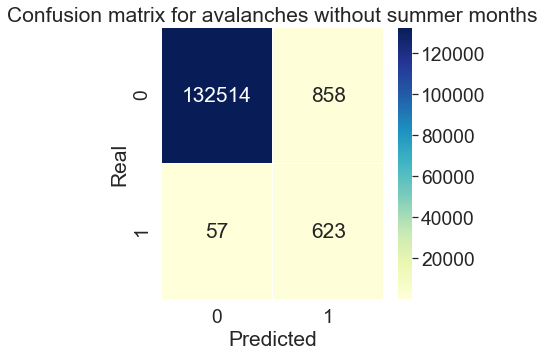

In [40]:
cf_matrix_win = confusion_matrix(test_labels_win, label_pred_win)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_win, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches without summer months")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [41]:
# displaying report of performance of model
print(classification_report(test_labels_win, label_pred_win, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.994     0.997    133372
           1      0.421     0.916     0.577       680

    accuracy                          0.993    134052
   macro avg      0.710     0.955     0.787    134052
weighted avg      0.997     0.993     0.994    134052



## Results for altitude from 1500 to 3600 metres

In [42]:
df.elevation.value_counts()

1800.0    74473
1500.0    74473
2100.0    74473
2400.0    71238
3000.0    64766
2700.0    64766
3300.0    51823
3600.0    29164
3900.0    19458
4200.0     9708
4800.0     3238
4500.0     3238
Name: elevation, dtype: int64

In [43]:
df_elevation = df.drop(columns=["massif_num","lon","lat","aval_type", "acccidental_risk_index", 
                            'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
                           'snow_water_1D', 'snow_water_3D', 'snow_water_5D', 'risk_index',
                           'thickness_of_wet_snow_top_of_snowpack','thickness_of_frozen_snow_top_of_snowpack',
                           'surface_air_pressure_mean', 'rainfall_rate', 'drainage', 'runoff',
                           'liquid_water_in_soil', 'frozen_water_in_soil', 'snow_melting_rate', 'aval_accident'])

In [44]:
# creating initial dataframe
df_massifs = pd.DataFrame(massifs, columns=['massif_name'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_massifs, columns=["massif_name"], prefix="massif")

# merge initial dataframe with dummies
df_massifs = df_massifs.join(dum_df)

# merge final datatset with dataframe with dummies
df_elevation = df_elevation.merge(df_massifs, how="left", on="massif_name")

In [45]:
# getting rid of redundant variable
df_elevation = df_elevation.drop(columns=['massif_name'])

In [46]:
# creating variable for months
df_elevation["month"] = (df_elevation.day.str[5:7]).astype(int)
df_elevation = df_elevation.drop(columns=['day'])

In [47]:
# verifying there are no null values in dataset
(df_elevation.apply(lambda x: x.isnull().sum())).sum()

0

In [48]:
# reducing altitudes where avalanches rarely occur
df_elevation = df_elevation[(df_elevation["elevation"]>1499) & (df_elevation["elevation"]< 3601)]

In [49]:
# last check of dataframe before using RF model
df_elevation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505176 entries, 0 to 540817
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   elevation                           505176 non-null  float64
 1   temp_soil_0.005_m                   505176 non-null  float64
 2   temp_soil_0.08_m                    505176 non-null  float64
 3   whiteness_albedo                    505176 non-null  float64
 4   net_radiation                       505176 non-null  float64
 5   surface_temperature                 505176 non-null  float64
 6   surface_snow_amount                 505176 non-null  float64
 7   thickness_of_snowfall               505176 non-null  float64
 8   snow_thickness_7D                   505176 non-null  float64
 9   snow_water_7D                       505176 non-null  float64
 10  penetration_ram_resistance          505176 non-null  float64
 11  near_surface_humidity_mean

In [50]:
# labels are the values we want to predict
labels_el = np.array(df_elevation['aval_event'])

# removing the labels from the features
features_el = df_elevation.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_el = list(features_el.columns)

# converting to numpy array
features_el = np.array(features_el)

In [51]:
# splitting dataset into train and test
train_features_el, test_features_el, train_labels_el, test_labels_el = train_test_split(features_el, labels_el, test_size = 0.33, random_state = 42)

In [52]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_el.shape)
print('Training Labels Shape:', train_labels_el.shape)
print('Testing Features Shape:', test_features_el.shape)
print('Testing Labels Shape:', test_labels_el.shape)

Training Features Shape: (338467, 44)
Training Labels Shape: (338467,)
Testing Features Shape: (166709, 44)
Testing Labels Shape: (166709,)


In [53]:
# getting number of positives and negatives in order to calculate scale_pos_weight
total_negative_el = df_elevation.aval_event.value_counts()[0]
total_positive_el = df_elevation.aval_event.value_counts()[1]
f"Number of total positives is {total_positive_el} and for total negatives it is {total_negative_el}"

'Number of total positives is 1843 and for total negatives it is 503333'

In [54]:
# scale_pos_weight for class weights
scale_pos_weight_el =total_negative_el/total_positive_el
scale_pos_weight_el

273.10526315789474

In [55]:
%%time

# defining  and fitting model 
xgb_el = XGBClassifier(scale_pos_weight=scale_pos_weight_el)
xgb_el.fit(train_features_el, train_labels_el)

# making prediction
label_pred_el = xgb_el.predict(test_features_el)

Wall time: 49.5 s


In [56]:
%%time

# evaluate model
scores = cross_val_score(xgb_el, features_el, labels_el, scoring='roc_auc', cv=cv, n_jobs=-1)

# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_el, label_pred_el),5))
print("F1_score weighted:", round(f1_score(test_labels_el, label_pred_el, average='weighted'),5))

Mean ROC AUC: 0.99832
Accuracy: 0.99392
F1_score weighted: 0.99518
Wall time: 29min 45s


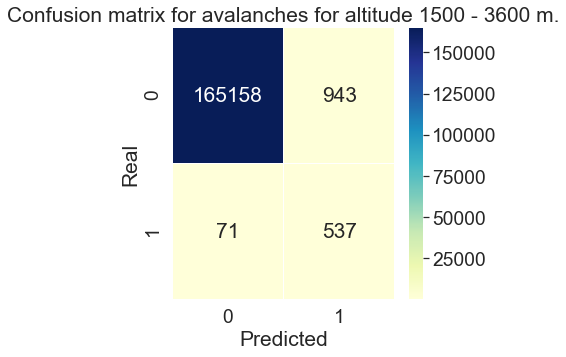

In [57]:
cf_matrix_el = confusion_matrix(test_labels_el, label_pred_el)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_el, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches for altitude 1500 - 3600 m.")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [58]:
# displaying report of performance of model
print(classification_report(test_labels_el, label_pred_el, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.994     0.997    166101
           1      0.363     0.883     0.514       608

    accuracy                          0.994    166709
   macro avg      0.681     0.939     0.756    166709
weighted avg      0.997     0.994     0.995    166709



## Results for limited altitude and without summer

In [59]:
# creating new dataframe for altitude from 1500 to 3600 and with exclusion of summer months
df_elev_win = df_elevation[~df_elevation["month"].isin(summer_season)]

In [60]:
# labels are the values we want to predict
labels_el_w = np.array(df_elev_win['aval_event'])

# removing the labels from the features
features_el_w = df_elev_win.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_el_w = list(features_el_w.columns)

# converting to numpy array
features_el_w = np.array(features_el_w)

In [61]:
# splitting dataset into train and test
train_features_el_w, test_features_el_w, train_labels_el_w, test_labels_el_w = train_test_split(features_el_w, labels_el_w, test_size = 0.33, random_state = 42)

In [62]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_el_w.shape)
print('Training Labels Shape:', train_labels_el_w.shape)
print('Testing Features Shape:', test_features_el_w.shape)
print('Testing Labels Shape:', test_labels_el_w.shape)

Training Features Shape: (254224, 44)
Training Labels Shape: (254224,)
Testing Features Shape: (125216, 44)
Testing Labels Shape: (125216,)


In [63]:
# getting number of positives and negatives in order to calculate scale_pos_weight
total_negative_el_w = df_elev_win.aval_event.value_counts()[0]
total_positive_el_w = df_elev_win.aval_event.value_counts()[1]
f"Number of total positives is {total_positive_el_w} and for total negatives it is {total_negative_el_w}"

'Number of total positives is 1819 and for total negatives it is 377621'

In [64]:
# scale_pos_weight for class weights
scale_pos_weight_el_w =total_negative_el_w/total_positive_el_w
scale_pos_weight_el_w

207.5981308411215

In [65]:
%%time

# defining  and fitting model 
xgb_el_w = XGBClassifier(scale_pos_weight=scale_pos_weight_el_w)
xgb_el_w.fit(train_features_el_w, train_labels_el_w)

# making prediction
label_pred_el_w = xgb_el_w.predict(test_features_el_w)

Wall time: 30.3 s


In [66]:
%%time

# evaluate model
scores = cross_val_score(xgb_el_w, features_el_w, labels_el_w, scoring='roc_auc', cv=cv, n_jobs=-1)

# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_el_w, label_pred_el_w),5))
print("F1_score weighted:", round(f1_score(test_labels_el_w, label_pred_el_w, average='weighted'),5))

Mean ROC AUC: 0.99820
Accuracy: 0.99463
F1_score weighted: 0.99546
Wall time: 22min 2s


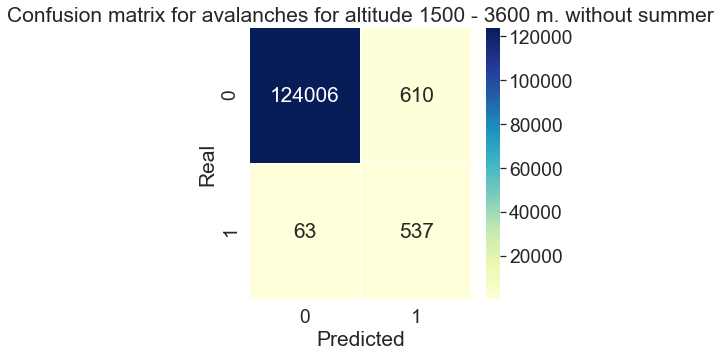

In [67]:
cf_matrix_el_w = confusion_matrix(test_labels_el_w, label_pred_el_w)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_el_w, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches for altitude 1500 - 3600 m. without summer")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [68]:
# displaying report of performance of model
print(classification_report(test_labels_el_w, label_pred_el_w, digits=3))

              precision    recall  f1-score   support

           0      0.999     0.995     0.997    124616
           1      0.468     0.895     0.615       600

    accuracy                          0.995    125216
   macro avg      0.734     0.945     0.806    125216
weighted avg      0.997     0.995     0.995    125216



## Results for French Alps (without massifs)

In [69]:
df_clean.columns

Index(['temp_soil_0.005_m', 'temp_soil_0.08_m', 'whiteness_albedo',
       'net_radiation', 'surface_temperature', 'surface_snow_amount',
       'thickness_of_snowfall', 'snow_thickness_7D', 'snow_water_7D',
       'penetration_ram_resistance', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'aval_event',
       'massif_Aravis', 'massif_Bauges', 'massif_Beaufortin',
       'massif_Belledonne', 'massif_Chablais', 'massif_Champsaur',
       'massif_Chartreuse', 'massif_Devoluy', 'massif_Gdes-rouss',
       'massif_Ht_Var-Ver', 'massif_Hte-maurie', 'massif_Hte-tarent',
       'massif_Maurienne', 'massif_Mercantour', 'massif_Mont-Blanc',
       'massif_Oisans', 'massif_Parpaillon', 'massif_Pelvoux',
       'massif_Queyras', 'massif_Thabor', 'massif_Ubaye', 'massif_Vanoise',
       'massif_Vercors', 'month

In [70]:
# removing variables with massifs
df_no_massifs = df_clean[['temp_soil_0.005_m', 'temp_soil_0.08_m', 'whiteness_albedo',
       'net_radiation', 'surface_temperature', 'surface_snow_amount',
       'thickness_of_snowfall', 'snow_thickness_7D', 'snow_water_7D',
       'penetration_ram_resistance', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'aval_event', 'month']]

In [71]:
# checking new dataframe
df_no_massifs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  near_surface_humidity_mean          540818 non-null  float64
 11  relative_humidity_mean    

In [72]:
# labels are the values we want to predict
labels_alps = np.array(df_no_massifs['aval_event'])

# removing the labels from the features
features_alps = df_no_massifs.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_alps = list(features_alps.columns)

# converting to numpy array
features_alps = np.array(features_alps)

In [73]:
# splitting dataset into train and test
train_features_alps, test_features_alps, train_labels_alps, test_labels_alps = train_test_split(features_alps, labels_alps, test_size = 0.33, random_state = 42)

In [74]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_alps.shape)
print('Training Labels Shape:', train_labels_alps.shape)
print('Testing Features Shape:', test_features_alps.shape)
print('Testing Labels Shape:', test_labels_alps.shape)

Training Features Shape: (362348, 20)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 20)
Testing Labels Shape: (178470,)


In [75]:
# getting number of positives and negatives in order to calculate scale_pos_weight
total_negative_alps = df_no_massifs.aval_event.value_counts()[0]
total_positive_alps = df_no_massifs.aval_event.value_counts()[1]
f"Number of total positives is {total_positive_alps} and for total negatives it is {total_negative_alps}"

'Number of total positives is 2039 and for total negatives it is 538779'

In [76]:
# scale_pos_weight for class weights
scale_pos_weight_alps =total_negative_alps/total_positive_alps
scale_pos_weight_alps

264.2368808239333

In [77]:
%%time

# defining  and fitting model 
xgb_alps = XGBClassifier(scale_pos_weight=scale_pos_weight_alps)
xgb_alps.fit(train_features_alps, train_labels_alps)

# making prediction
label_pred_alps = xgb_alps.predict(test_features_alps)

Wall time: 37.6 s


In [78]:
%%time

# evaluate model
scores = cross_val_score(xgb_alps, features_alps, labels_alps, scoring='roc_auc', cv=cv, n_jobs=-1)

# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_alps, label_pred_alps),5))
print("F1_score weighted:", round(f1_score(test_labels_alps, label_pred_alps, average='weighted'),5))

Mean ROC AUC: 0.99506
Accuracy: 0.99057
F1_score weighted: 0.9929
Wall time: 24min 51s


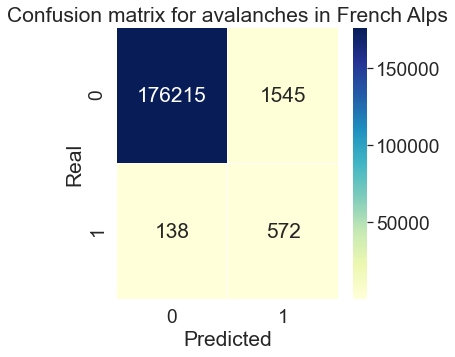

In [79]:
cf_matrix_alps = confusion_matrix(test_labels_alps, label_pred_alps)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_alps, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches in French Alps")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [80]:
# displaying report of performance of model
print(classification_report(test_labels_alps, label_pred_alps, digits=3))

              precision    recall  f1-score   support

           0      0.999     0.991     0.995    177760
           1      0.270     0.806     0.405       710

    accuracy                          0.991    178470
   macro avg      0.635     0.898     0.700    178470
weighted avg      0.996     0.991     0.993    178470



## Results for French Alps without summer

In [81]:
df_alps_win = df_no_massifs[~df_no_massifs["month"].isin(summer_season)]

In [82]:
# labels are the values we want to predict
labels_alps_win = np.array(df_alps_win['aval_event'])

# removing the labels from the features
features_alps_win = df_alps_win.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_alps_win = list(features_alps_win.columns)

# converting to numpy array
features_alps_win = np.array(features_alps_win)

In [83]:
# splitting dataset into train and test
train_features_alps_win, test_features_alps_win, train_labels_alps_win, test_labels_alps_win = train_test_split(features_alps_win, labels_alps_win, test_size = 0.33, random_state = 42)

In [84]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_alps_win.shape)
print('Training Labels Shape:', train_labels_alps_win.shape)
print('Testing Features Shape:', test_features_alps_win.shape)
print('Testing Labels Shape:', test_labels_alps_win.shape)

Training Features Shape: (272164, 20)
Training Labels Shape: (272164,)
Testing Features Shape: (134052, 20)
Testing Labels Shape: (134052,)


In [85]:
# getting number of positives and negatives in order to calculate scale_pos_weight
total_negative_alps_win = df_alps_win.aval_event.value_counts()[0]
total_positive_alps_win = df_alps_win.aval_event.value_counts()[1]
f"Number of total positives is {total_positive_alps_win} and for total negatives it is {total_negative_alps_win}"

'Number of total positives is 2003 and for total negatives it is 404213'

In [86]:
# scale_pos_weight for class weights
scale_pos_weight_alps_win =total_negative_alps_win/total_positive_alps_win
scale_pos_weight_alps_win

201.8037943085372

In [87]:
%%time

# defining  and fitting model 
xgb_alps_win = XGBClassifier(scale_pos_weight=scale_pos_weight_alps_win)
xgb_alps_win.fit(train_features_alps_win, train_labels_alps_win)

# making prediction
label_pred_alps_win = xgb_alps_win.predict(test_features_alps_win)

Wall time: 26.6 s


In [88]:
%%time

# evaluate model
scores = cross_val_score(xgb_alps_win, features_alps_win, labels_alps_win, scoring='roc_auc', cv=cv, n_jobs=-1)

# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_alps_win, label_pred_alps_win),5))
print("F1_score weighted:", round(f1_score(test_labels_alps_win, label_pred_alps_win, average='weighted'),5))

Mean ROC AUC: 0.99418
Accuracy: 0.98995
F1_score weighted: 0.99217
Wall time: 19min 26s


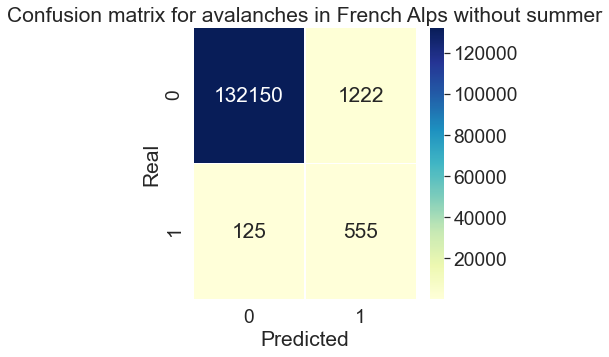

In [89]:
cf_matrix_alps_win = confusion_matrix(test_labels_alps_win, label_pred_alps_win)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_alps_win, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanches in French Alps without summer")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [90]:
# displaying report of performance of model
print(classification_report(test_labels_alps_win, label_pred_alps_win, digits=3))

              precision    recall  f1-score   support

           0      0.999     0.991     0.995    133372
           1      0.312     0.816     0.452       680

    accuracy                          0.990    134052
   macro avg      0.656     0.904     0.723    134052
weighted avg      0.996     0.990     0.992    134052



## Summary of XGBoost results:

Recall for days with avalanche (in order to reduce number of false negatives) was my primary metrics to evaluate performance of avalanche prediction, with weighted F1 score following closely behind. **I used 5 variants of feature selection in order to improve recall. Original sample without feature selection resulted in recall 0.887 for days with avalanches and weighted F1-score 0.99443.** Precision and recall for days without avalanches were in all 6 variants 1 or very close to 1, therefore this metrics won't be discussed further.


- **Feature selection**: I used 5 different changes to features: 

A) sample without summer months 
B) sample with limited altitude (not more than 3600 metres) 
C) sample without massif division. 

Also I checked combinations of A+B and A+C. 

The worst results were from option C) and  A+C). F1-score and recall for avalanche days has dropped. On the other hand, **the best recall for avalanche days had option A) (0.916), therefore this would be my preferred XGBoost model.** Even though other options B) and B+A) had slightly better F1-score (0.995 instead of 0.994 for option A) still I prefer A) option. Lower F1-score was consequence of slightly lower recall for days without any avalanche, but this metrics has lesser importance.


All the models generated similar F1-scores 0.992–0.995. **Sample without summer months had 0.916 recall for avalanche days, therefore would be the most prefered option**.

-**Comparision with Random Forest model**:
Previously, I tried Random Forest ML model, which had slightly better weighted F1-scores (0.997-0.998), but recall for days with avalanche was significatly worse, only 0.58 at best, and therefore XGBoost machine learning models are better option than Random Forest.

**Conclusion: I would choose XGBoost on sample without summer months, because it has the best recall for avalanche days 0.916 and acceptable F1 score.** When comparing with results from Random Forest, XGBoost proved to be better choice, because of significant improvement in recall for avavlanche days, even though overall F1-score was little bit lower for all XGBoost models. But this was because of lower metrics like recall for days without avalanche or precision for avalanche days, which are not that important.